## Library import and first look at data

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as skmetric
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
import scikitplot.metrics as splt
from sklearn.model_selection import GridSearchCV,cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns
# age
# sex (1: male; 0: female)
# cp: chest pain type (4 values)
# trestbps: resting blood pressure
# chol: serum cholestoral in mg/dl
# fbs: fasting blood sugar > 120 mg/dl (1: true; 0: false)
# restecg: resting electrocardiographic results (values 0,1,2)
# thalach: maximum heart rate achieved
# exang: exercise induced angina
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# ca: number of major vessels (0-4) colored by flourosopy
# thal: blood disorder called thalassemia (0 = normal; 1 = fixed defect; 2 = reversable defect)
# target: 0: no disease; 1: disease

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()
# float64(1), int64(13) --> 14 columns
# 1025 non-null samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().T
# Statistical measurements of the dataset

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


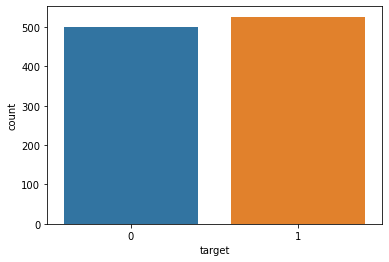

1    526
0    499
Name: target, dtype: int64

In [6]:
sns.countplot(x="target", data=df)
plt.show()

df.target.value_counts()

# balanced dataset

In [7]:
# continuous and categorical variables

cont_var = ['age','trestbps','chol','thalach','oldpeak']
cat_var = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

## Continuous Variable Analysis 

<AxesSubplot:>

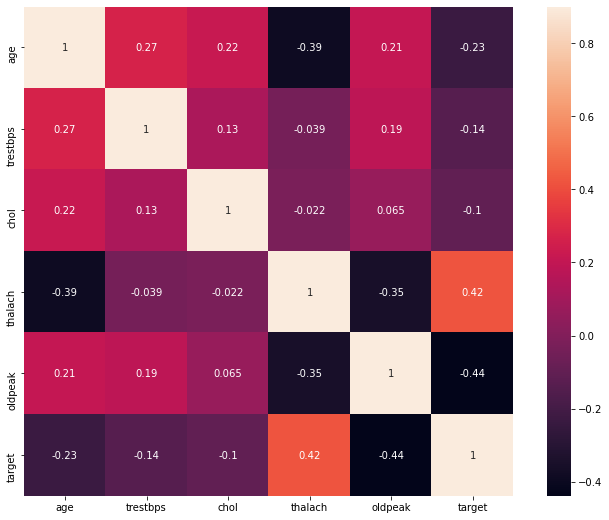

In [8]:
corrmat = pd.concat([df[cont_var],df['target']],axis=1).corr(method='pearson')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True)

# thalach and oldpeak have high correlation (positive and negative) with target
# age and thalach have high correlation
# outliers decrease correlation values

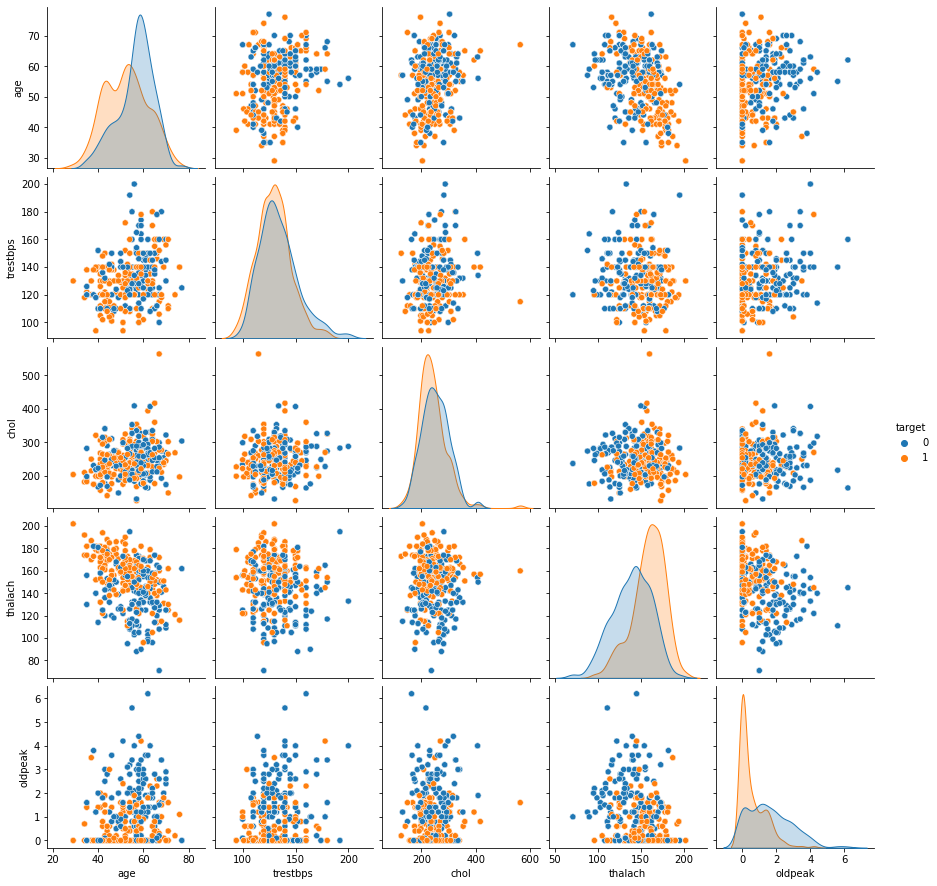

In [9]:
data_temp = df[['age','trestbps','chol','thalach','oldpeak','target']]
sns.pairplot(data_temp, hue="target")

# age, thalach and oldpeak distribution seperated by target
# trestbps and chol not too much but their relationship with oldpeak shows there is a seperation

## Categorical Variable Analysis 

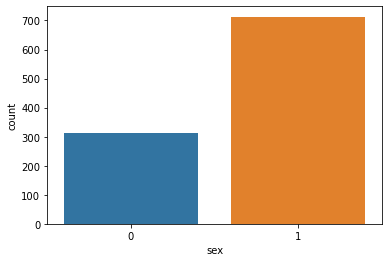

1    713
0    312
Name: sex, dtype: int64




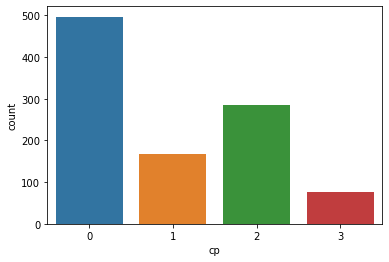

0    497
2    284
1    167
3     77
Name: cp, dtype: int64




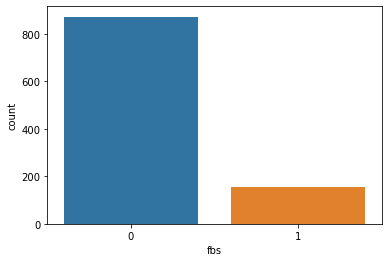

0    872
1    153
Name: fbs, dtype: int64




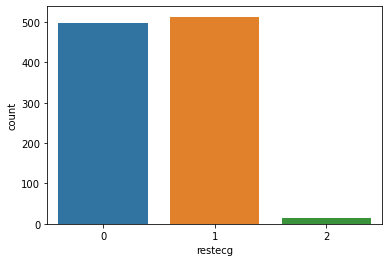

1    513
0    497
2     15
Name: restecg, dtype: int64




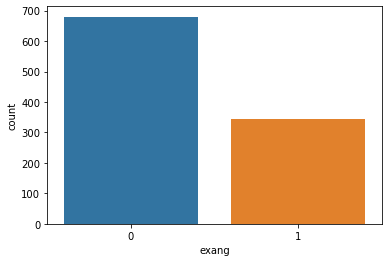

0    680
1    345
Name: exang, dtype: int64




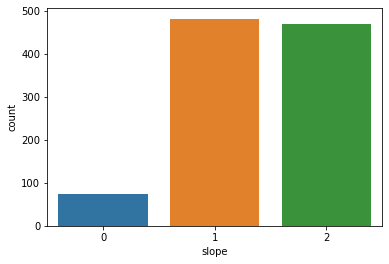

1    482
2    469
0     74
Name: slope, dtype: int64




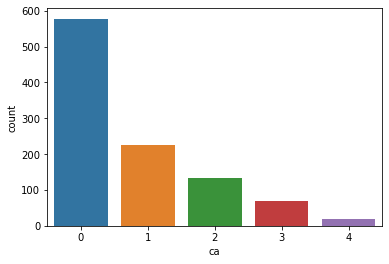

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64




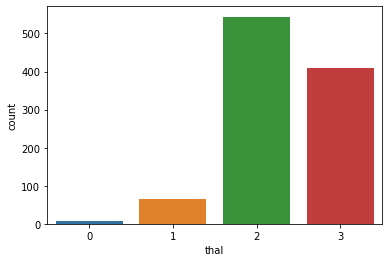

2    544
3    410
1     64
0      7
Name: thal, dtype: int64




In [10]:
# value counts of discrete variables

for i in cat_var:
    sns.countplot(x=i, data=df)
    plt.show()
    print(df[i].value_counts())
    print('\n')

## Missing Data Handling Methods

In [11]:
df.isnull().sum() #No missing values to deal with in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Applying Normalization
* Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
* In our example, Min-Max Normalization method is applied.

In [12]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

columns_to_be_scaled = ["trestbps","chol","thalach","age"]
for i in columns_to_be_scaled:
    df[i] = scaling(i)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,1.0,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,3.1,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,2.6,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.0,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,1.9,1,3,2,0


## Applying Categorical Encoding Techniques (Dummy Variable/One Hot Encoding)

In [14]:
df_cp =pd.get_dummies(df, columns = ["cp"],prefix=["cp_is"])
df_restecg =pd.get_dummies(df, columns = ["restecg"],prefix=["restecg_is"])
df_slope =pd.get_dummies(df, columns = ["slope"],prefix=["slope_is"])
df_ca =pd.get_dummies(df, columns = ["ca"],prefix=["ca_is"])
df_thal =pd.get_dummies(df, columns = ["thal"],prefix=["thal_is"])


df = pd.concat([df,df_cp,df_restecg,df_slope,df_ca,df_thal], axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['cp', 'restecg','slope', 'ca','thal'],axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_is_0,...,slope_is_2,ca_is_0,ca_is_1,ca_is_2,ca_is_3,ca_is_4,thal_is_0,thal_is_1,thal_is_2,thal_is_3
0,0.479167,1,0.292453,0.196347,0,0.740458,0,1.0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0.500000,1,0.433962,0.175799,1,0.641221,1,3.1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0.854167,1,0.481132,0.109589,0,0.412214,1,2.6,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.666667,1,0.509434,0.175799,0,0.687023,0,0.0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0.687500,0,0.415094,0.383562,1,0.267176,0,1.9,0,1,...,0,0,0,0,1,0,0,0,1,0


In [15]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3', 'restecg_is_0',
       'restecg_is_1', 'restecg_is_2', 'slope_is_0', 'slope_is_1',
       'slope_is_2', 'ca_is_0', 'ca_is_1', 'ca_is_2', 'ca_is_3', 'ca_is_4',
       'thal_is_0', 'thal_is_1', 'thal_is_2', 'thal_is_3'],
      dtype='object')

# Machine Learning Modeling

## Train - Test Split
* Train dataset is split into test-train parts to be able to use in ML algorithms.
* 70% for training and 30% for testing

In [21]:
y=df["target"] #output column
X=df.drop(["target"],axis=1) #train columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

### 1-KNN Classifier
* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

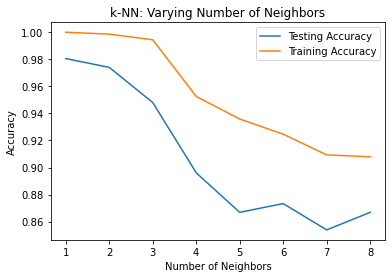

In [22]:
#KNN
# The following code creates 9 models for each K value from 1 to 9 and show the training and testing accuracies for each K.
# From the figure, we need to choose K value which is not too high and have the highest accuracies for testing and training sets
# When K gets higher, the model gets more complicated and requires more computational power and time.
# 3 or 4 looks good from the figure below according to the accuracies.

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<Figure size 432x288 with 0 Axes>

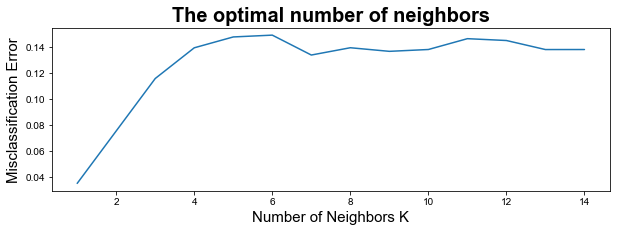

In [25]:
# The code will create models by trying K values from 1 to 20 by using Cross Validation method.
# When the K increases, misclassification error reduces,however, we need to choose the elbow point as K value.
# In the following figure, K can be chosen as 3 or 4.
# Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
# CV is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 
# That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to 
# make predictions on data not used during the training of the model.

k_list = list(range(1,15))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
  
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(10,3))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [53]:
knn =KNeighborsClassifier(n_neighbors=3,p=2) #K=5 and p=2 (Minkowski distance)
knn_model = knn.fit(X_train,y_train) # Creating the model
y_pred_knn = knn.predict(X_test) # Calculating the predictions using the model

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       159
           1       0.95      0.95      0.95       149

   micro avg       0.95      0.95      0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308

AxesSubplot(0.125,0.125;0.62x0.755)


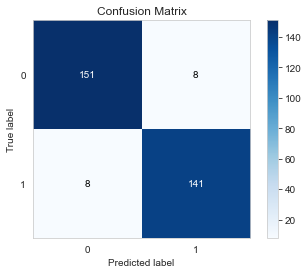

In [54]:
print(classification_report(y_test,y_pred_knn)) #Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_knn)) #Confusion matrix
plt.show();

### 2- Random Forest Classifier
* Random forest is an ensemble machine learning algorithm.
*  A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [31]:
rf_model_final = RandomForestClassifier() # Object creation
rf_model_final.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_final = rf_model_final.predict(X_test) # Getting the predictions

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

   micro avg       0.98      0.98      0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

AxesSubplot(0.125,0.125;0.62x0.755)


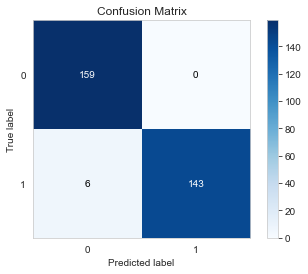

In [32]:
print(classification_report(y_test,y_pred_final)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_final)) # Confusion matrix
plt.show();

## 3 - Logistic Regression Classifier - Regularization Applied
* Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* L1 regularization method is defined as penalty while creating the LogisticRegression object defined.

In [38]:
log_reg = LogisticRegression(solver = "liblinear",penalty="l1") # L1 regularization method is defined
log_model = log_reg.fit(X_train,y_train) # Creating the model
y_pred_log_reg = log_model.predict(X_test) # Calculating the predictions using the model

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       159
           1       0.78      0.88      0.83       149

   micro avg       0.82      0.82      0.82       308
   macro avg       0.83      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308

AxesSubplot(0.125,0.125;0.62x0.755)


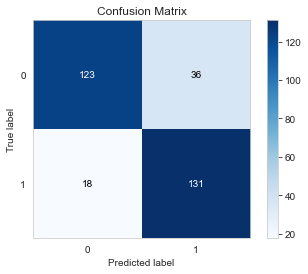

In [39]:
print(classification_report(y_test,y_pred_log_reg)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_log_reg)) # Confusion matrix
plt.show();

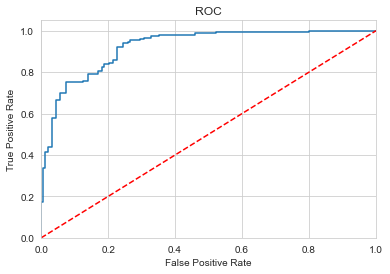

In [40]:
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
# Red line indicates the success that if we didn't create any model, the fundamental success.
# When the area gets higher, it means that our success is getting better and better. (AUC - Area Under Curve)

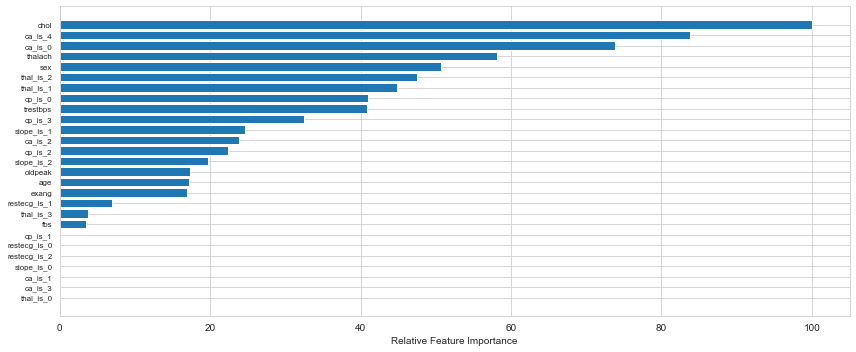

In [48]:
# Feature Importances
feature_importance = abs(log_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12, 5))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

#chol,ca_is_4,ca_is_0,thalach and sex columns are the first most important for the model.